# Introduction to Machine Learning: The Perceptron

The aim of this notebook is to walk you through the procedures for training the most simple machine learning algorithm: the Perceptron. The perceptron works as a single node which has the ability to predict a binary output given some input data. The node is 'trained' through a continuous procedure of prediction, checking with the ground truth, updating the weighing of importance of each input parameter, and then predicting again.

## Terminology:

Perceptron: a sinlge node network producing a binary output

Weigths: The weighting each input parameter is given by the network (randomised before training)

Activation function: The function the network prediction is given to to select a final output (in the case of a perceptron we use a step function)

Loss/ cost function: A way of calculating 'how far away' from the ground truth the final prediction of the network is (usually either a least squares or cross-entropy function is used)

Gradient decent: The process of taking the first derivative of the cost function to minimise it and update the weights

Learning rate: How much the first derivative of the cost function contibutes to the updating of the weights. A faster learning rate means that each gradient decent contributes more to the weight updating (which can speed up the learning but can also prodcue overfitting)

Epoch: the number of times the entire training set is used for training

Batch size: the number of training examples given at once to the network to perform gradient decent on

Stochastic gradient decent: Gradient decent on a batch size of 1

## Load in Python modules

In [2]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Iris dataset

The Iris dataset is a famous dataset used in Machine Learning and contains 150 elements. Each elements is a different kind of Iris flower, either setosa, versicolo or virgininca. The dataset was made by Sir R.A. Fisher in 1936, in which he recorded 4 attributes about 150 different flowers, across the 3 different types, to see if one could differentiate between the types based on the data.

## The data

First we must load in the Iris dataset. Conveniently, the dataset is in the standard library of nicely processed datasets contained in the module 'sklearn', which is a simple, and commonly used machine learning Python module.

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print (iris.keys()) #these are different classes which can be called using a modular format

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [10]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


For simplicity we shall only keep only the first 2 variables and data with y-values equal to 0 and 1, where the possible y-values are 0,1,2 for the whole dataset.

This will allow us to plot a 2D graph of our results

In [15]:
X = iris.data[:,[2,3]]
y = iris.target
T = []
u = []

#here we keep only the elements that have a label of 0 or 1
for i in range(0,len(y)):
    if y[i] == 0 or y[i] == 1:
        T.append(X[i])
        u.append(y[i])

When testing a network we want to ensure that it is not being tested on information it has been trained on (or 'seen' before). Therefore, we split our daya into training and testing sets.

In [16]:
## sklearn has a function for slitting the sets into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T, u, random_state=0)

We then normalise the data to ensure a fair comparison between different parameters

In [17]:
# again, sklearn has an inbuild function for normalising data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Linear regression Perceptron

Define the Perceptron with a step function activation function

Here we will use a batch size of 1 for simplicity

In [57]:
class LinearPerceptron:
    def __init__(self,eta,nepochs):
        self.eta = eta #learning rate
        self.nepochs = nepochs #number of epochs
        
    def weighted_sum(self,xdata,index):
        '''weighted sum of weights and parameters'''
        return np.dot(self.weights[1:],xdata[index]) + self.weights[0]
    
    def activation(self,output):
        ''' activation function (step function here)'''
        if output >= 0:
            return 1
        else:
            return 0
    
    def fit(self,xtrain,ytrain):
        '''train the network'''
        #initialise the weights to random values
        self.weights = np.random.rand(len(xtrain[0])+1)
        
        #loop over the number of epochs stated
        for j in range(self.nepochs):
            
            #loop over each training example individually
            for i in range(len(xtrain)):

                w_sum = self.weighted_sum(xtrain,i)
                ypred = self.activation(w_sum)
                    
                # update the weights
                self.weights[0] += self.eta*(ytrain[i] - ypred)
                self.weights[1:] += self.eta*(ytrain[i] - ypred)*xtrain[i]
        return self
    
    def predict(self,xtest):
        ypred = np.zeros((len(xtest)))
        for i in range(len(xtest)):
            if self.weighted_sum(xtest,i) >= 0:
                ypred[i] = 1
        return ypred

Set the initial parameters of the model

In [63]:
ppn = LinearPerceptron(eta = 0.1, nepochs = 40)

Fit the model

In [64]:
ppn.fit(X_train,y_train)

<__main__.LinearPerceptron instance at 0x1080981b8>

Test the model

In [65]:
y_pred = ppn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


Plot the model

In [66]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                       test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

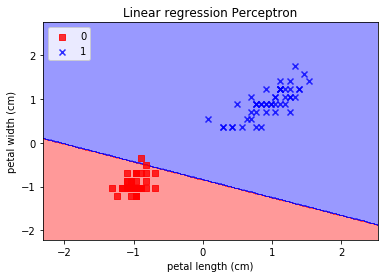

In [67]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
#plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn)
plt.title(r'Linear regression Perceptron')
plt.xlabel(r'petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')

plt.savefig("LinearPerceptron.png", dpi = 300)